# 随机森林


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      8504
           1       0.49      0.12      0.19      1496

    accuracy                           0.85     10000
   macro avg       0.68      0.55      0.55     10000
weighted avg       0.81      0.85      0.81     10000

AUC: 0.7892565735030007
Confusion Matrix:
 [[8323  181]
 [1322  174]]


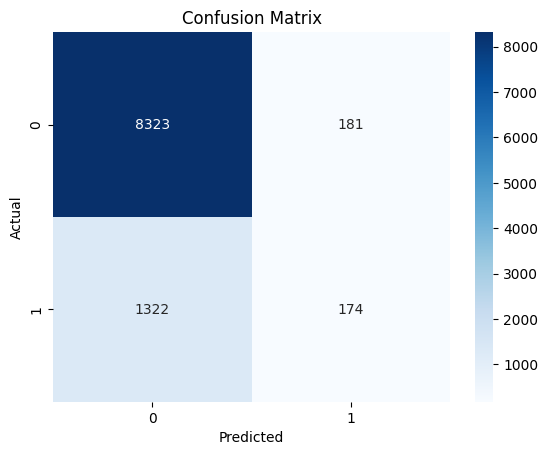

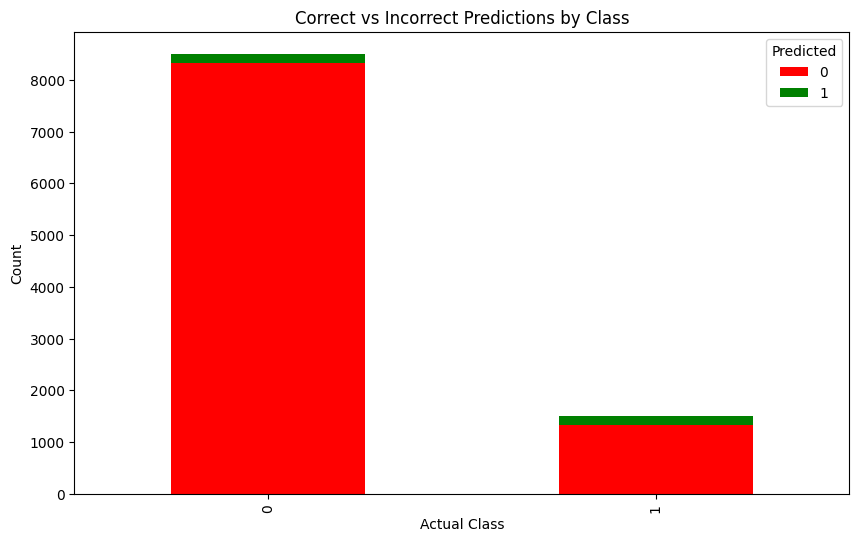

                        Feature  Importance
1                 purchase_lead    0.129111
2                length_of_stay    0.106805
3                   flight_hour    0.104867
4                    flight_day    0.073225
810    booking_origin_Australia    0.049207
8               flight_duration    0.043011
0                num_passengers    0.040776
857     booking_origin_Malaysia    0.031991
7         wants_in_flight_meals    0.019687
5           wants_extra_baggage    0.017223
6          wants_preferred_seat    0.015243
910        sales_channel_Mobile    0.012534
725                route_PENTPE    0.007521
891  booking_origin_South Korea    0.006536
843    booking_origin_Indonesia    0.006489
14                 route_AKLKUL    0.005361
849        booking_origin_Japan    0.005324
867  booking_origin_New Zealand    0.005003
897       booking_origin_Taiwan    0.004972
886    booking_origin_Singapore    0.004946
823        booking_origin_China    0.004939
899     booking_origin_Thailand 

C:\Users\40118\AppData\Local\Temp\ipykernel_40164\66079057.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


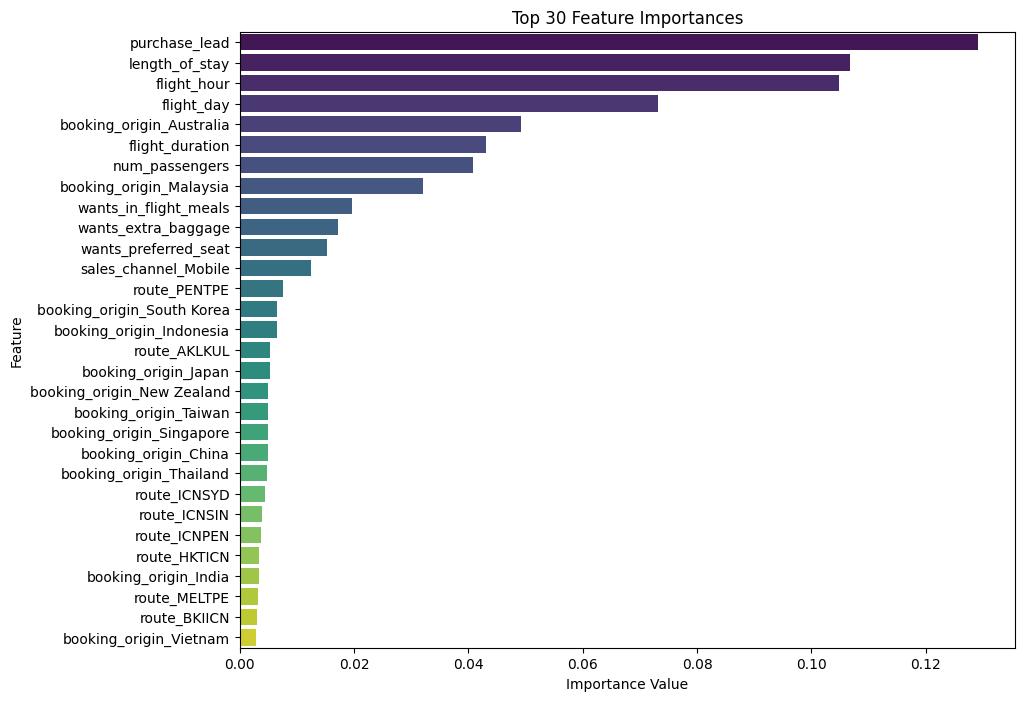

In [4]:
# 加载数据，检查数据的基本信息和分布
# 确保数据加载正确，识别可能需要处理的缺失值或异常值

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")

# 展示星期几的对应数值
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}
df["flight_day"] = df["flight_day"].map(mapping)

# One-Hot Encoding 处理非数值数据
df_encoded = pd.get_dummies(df, columns=['route', 'booking_origin', 'sales_channel', 'trip_type'], drop_first=True)

# 分割数据集：特征变量 X 和目标变量 y
X = df_encoded.drop('booking_complete', axis=1)
y = df_encoded['booking_complete']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 构建随机森林模型
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# 评估模型在测试集上的表现
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # 获取正类的概率

# 打印分类报告
print('Classification Report:\n', classification_report(y_test, y_pred))

# 计算 AUC
print('AUC:', roc_auc_score(y_test, y_proba))

# 打印混淆矩阵
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

# 混淆矩阵热力图
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 推测和实际结果的对比：文图同步
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# 历史数据分类结果的堆积条形图
confusion_results = results_df.groupby(['Actual', 'Predicted']).size().unstack(fill_value=0)
confusion_results.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])
plt.xlabel('Actual Class')
plt.ylabel('Count')
plt.title('Correct vs Incorrect Predictions by Class')
plt.show()

# 特征重要性的可视化
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)


# 打印前30个特征的重要性
print(feature_importances.head(30))

# # 用柱状图可视化特征重要性
# plt.figure(figsize=(10, 8))
# feature_importances.set_index('Feature').plot(kind='barh', legend=False, figsize=(10, 8))
# plt.xlabel('Importance Value')
# plt.title('Feature Importance')
# plt.show()

# 用柱状图可视化前30个特征的重要性
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_importances.head(30),  # 只显示前30个
    palette='viridis'
)
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.title('Top 30 Feature Importances')
plt.show()


In [5]:
# 1. 使用 cross_val_score 进行K折交叉验证：

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 加载数据，假设 X 和 y 已经准备好
# X, y 你可以直接用你之前的数据集

# 初始化模型
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# 使用K折交叉验证评估模型，cv=5表示5折交叉验证
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# 输出每折的得分和平均得分
print("Cross-Validation Scores: ", scores)
print("Mean Accuracy: ", np.mean(scores))


Cross-Validation Scores:  [0.85   0.7977 0.7383 0.5788 0.7731]
Mean Accuracy:  0.74758


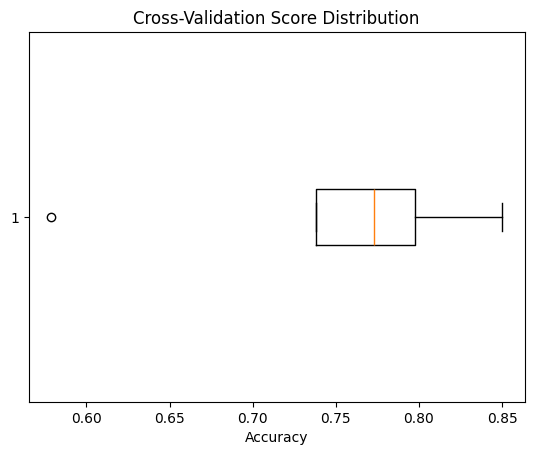

In [6]:
import matplotlib.pyplot as plt

# 可视化各折得分
plt.boxplot(scores, vert=False)
plt.title("Cross-Validation Score Distribution")
plt.xlabel("Accuracy")
plt.show()